In [1]:
# MNIST dataset
# Dataloader, Transformation
# Multilayer Neural Net, activation function
# Loss, optimizer
# Training loop (batch training)
# Model evaluation
# GPU support

In [2]:
import torch
import torch.nn as nn 
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
# Hyperparams
input_size = 784 # 28 * 28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [5]:
# MNIST

In [6]:
train_dataset = torchvision.datasets.MNIST(root="./data/mnist/", train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data/mnist/', train=False, transform=transforms.ToTensor())

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


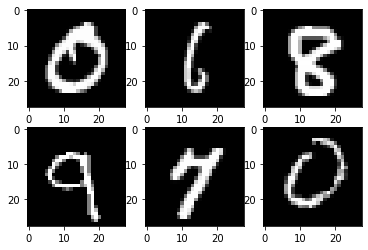

In [9]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # No softmax needed if using CrossEntropyLoss()
        return out

In [11]:
model = NeuralNet(input_size, hidden_size, num_classes)
# Model need to be on Cuda too!
model = model.to(device)

In [12]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
# Training loop
n_total_steps = len(train_loader)
n_total_steps

600

In [14]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape 100*[1*28*28] image batch to 100*784 tensors
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f"Epoch {epoch + 1} / {num_epochs}, Step {i+1}/{n_total_steps}, Loss = {loss.item():.4f}")

# test; don't need to compute any grads
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # value, index = torch.max() ## Don't need the actual value
        _, predictions = torch.max(outputs.data, 1)
        n_samples += labels.shape[0] # num images in current batch
        n_correct += (predictions == labels).sum().item()

acc = 100 * n_correct / n_samples
print(f"Accuracy = {acc:.4f}%")

Epoch 1 / 2, Step 100/600, Loss = 0.3937
Epoch 1 / 2, Step 200/600, Loss = 0.4466
Epoch 1 / 2, Step 300/600, Loss = 0.2924
Epoch 1 / 2, Step 400/600, Loss = 0.2721
Epoch 1 / 2, Step 500/600, Loss = 0.2838
Epoch 1 / 2, Step 600/600, Loss = 0.1191
Epoch 2 / 2, Step 100/600, Loss = 0.0738
Epoch 2 / 2, Step 200/600, Loss = 0.1951
Epoch 2 / 2, Step 300/600, Loss = 0.1035
Epoch 2 / 2, Step 400/600, Loss = 0.0788
Epoch 2 / 2, Step 500/600, Loss = 0.2750
Epoch 2 / 2, Step 600/600, Loss = 0.0743
Accuracy = 97.0600%


In [15]:
len(train_loader)

600

In [16]:
len(test_loader)

100